In [1]:
from load_modules import * 
from collections import defaultdict

In [2]:
filenames = ["../../data/Raman_Mouse/cosmic_ray_test/Kidney_map_150z25_60s_#35.txt"]
data = load_files([filenames], True)


plt.rcParams['figure.figsize'] = (10.0, 3.0)
plt.rcParams['figure.dpi'] = 250
plt.rcParams['lines.linewidth'] = 0.8


start loading data, number of files 1
opening file 1 of 1: ../../data/Raman_Mouse/cosmic_ray_test/Kidney_map_150z25_60s_#35.txt
loaded  file 1 of 1: ../../data/Raman_Mouse/cosmic_ray_test/Kidney_map_150z25_60s_#35.txt


In [3]:
img, wavenumbers = data[0][0], data[1][0]

In [61]:
# stats to removal all cosmic ray noise (produces a very few false positives or noise detections)
cosmicray_removal = CosmicrayCorrection.remove_cosmicrays(wavenumbers, 
                                                          n_times=5.5,
                                                          FWHM_smoothing=3,
                                                          min_FWHM=6.5,
                                                          region_padding=5,
                                                          occurrence_percentage=0.005,
                                                          interpolate_degree=3)
d, t = cosmicray_removal(copy.copy(img))
wavenumber, count = np.unique([y for x in t.values() for y, _ in x.items()], return_counts=True)
sum(count)
# d3, t3 = copy.copy(d), copy.copy(t)

122

In [5]:
# print(sum(count))
# for (x,y), values in t.items():
# #     if (x,y) not in t3:
#     plt.plot(img[x,y])
#     plt.plot(d[x,y])
#     plt.show()


In [77]:
# add cosmic ray noise
def gaussian(x, mu, sigma):
    x = np.exp(-0.5* ((x - mu) / sigma)**2)
    return x

new_img = copy.copy(d)

cosmic_noise = set()
for _ in range(int(3750*0.05)):
    sigma = np.random.uniform(1.0,3.0) / 2.355
    height = np.random.uniform(300,2500)
    width = np.random.randint(5,35)
    location = np.random.randint(25,975)
    l, r = location - width//2, location + width//2
    x,y = np.random.randint(150), np.random.randint(25)

    new_img[x,y][l:r] += gaussian(np.arange(l,r), location, sigma) * height
    cosmic_noise.add((x,y,location))

In [78]:
# for (x,y), values in cosmic_noise.items():
#     print(x,y,values)
#     plt.plot(new_img[x,y])
#     plt.show()


In [79]:
# stats to removal all cosmic ray noise (produces a very few false positives or noise detections)
cosmicray_removal = CosmicrayCorrection.remove_cosmicrays(wavenumbers, 
                                                          n_times=7,
                                                          FWHM_smoothing=3,
                                                          min_FWHM=7,
                                                          region_padding=5,
                                                          occurrence_percentage=0.01,
                                                          interpolate_degree=3)
d2, t2 = cosmicray_removal(copy.copy(new_img))
wavenumber, count = np.unique([y for x in t2.values() for y, _ in x.items()], return_counts=True)
sum(count), len(cosmic_noise)

(190, 187)

total incorrect found cosmic rays 7 0.03825136612021858
unfound cosmic rays 62 21 588


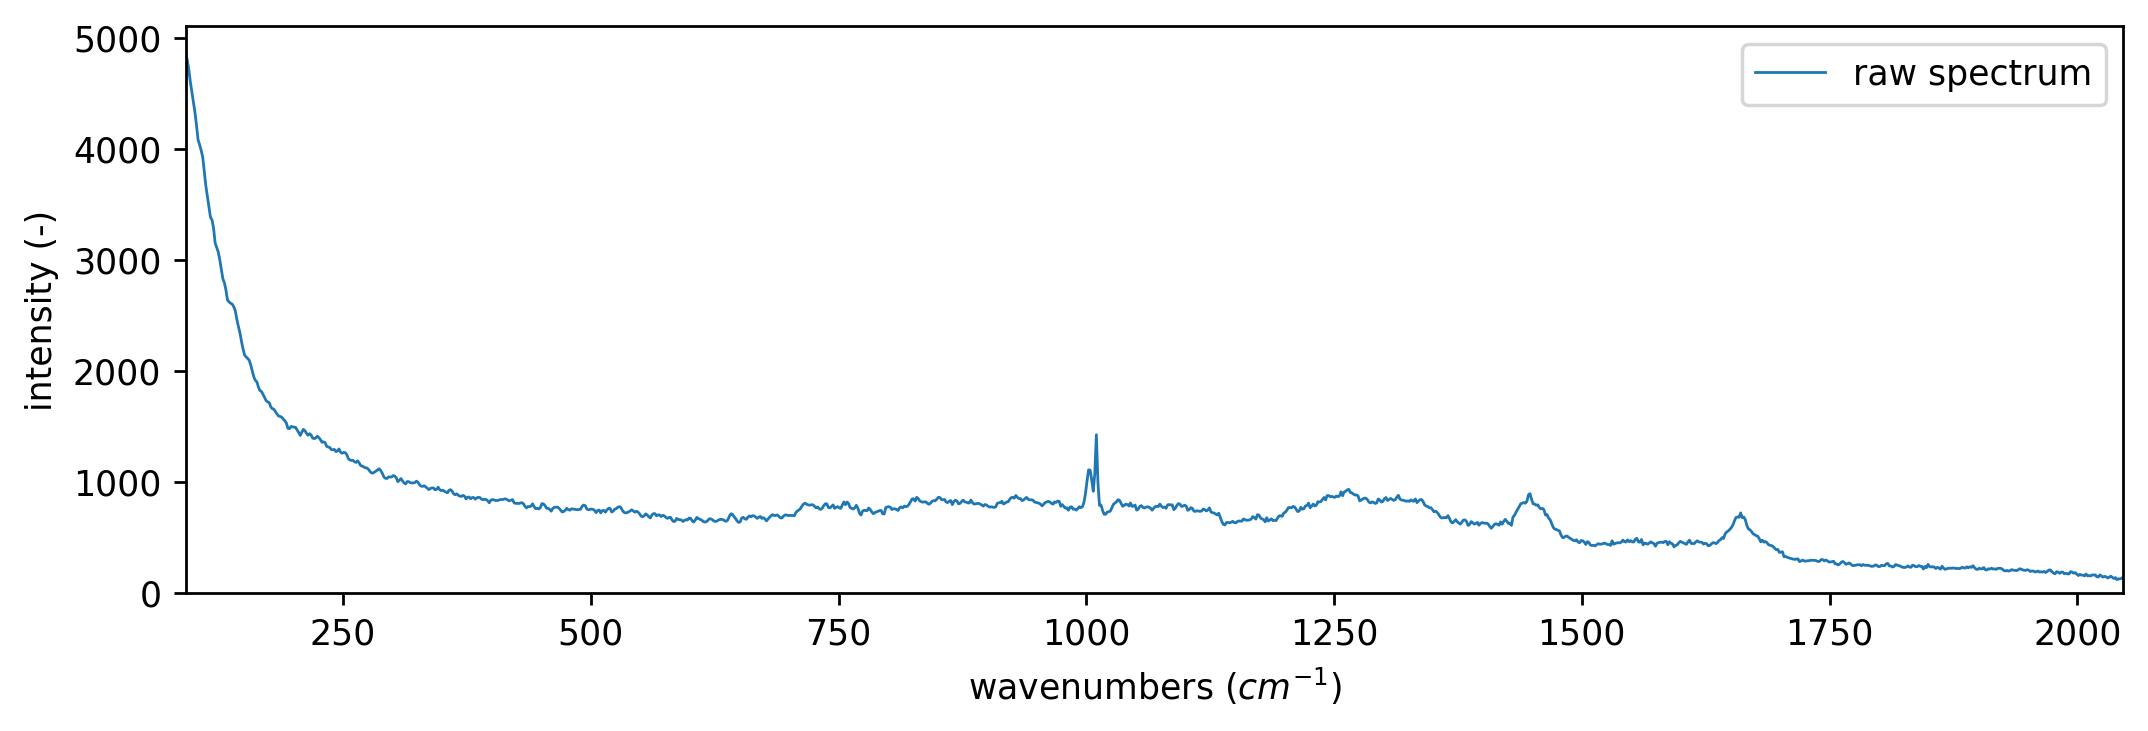

unfound cosmic rays 66 20 350


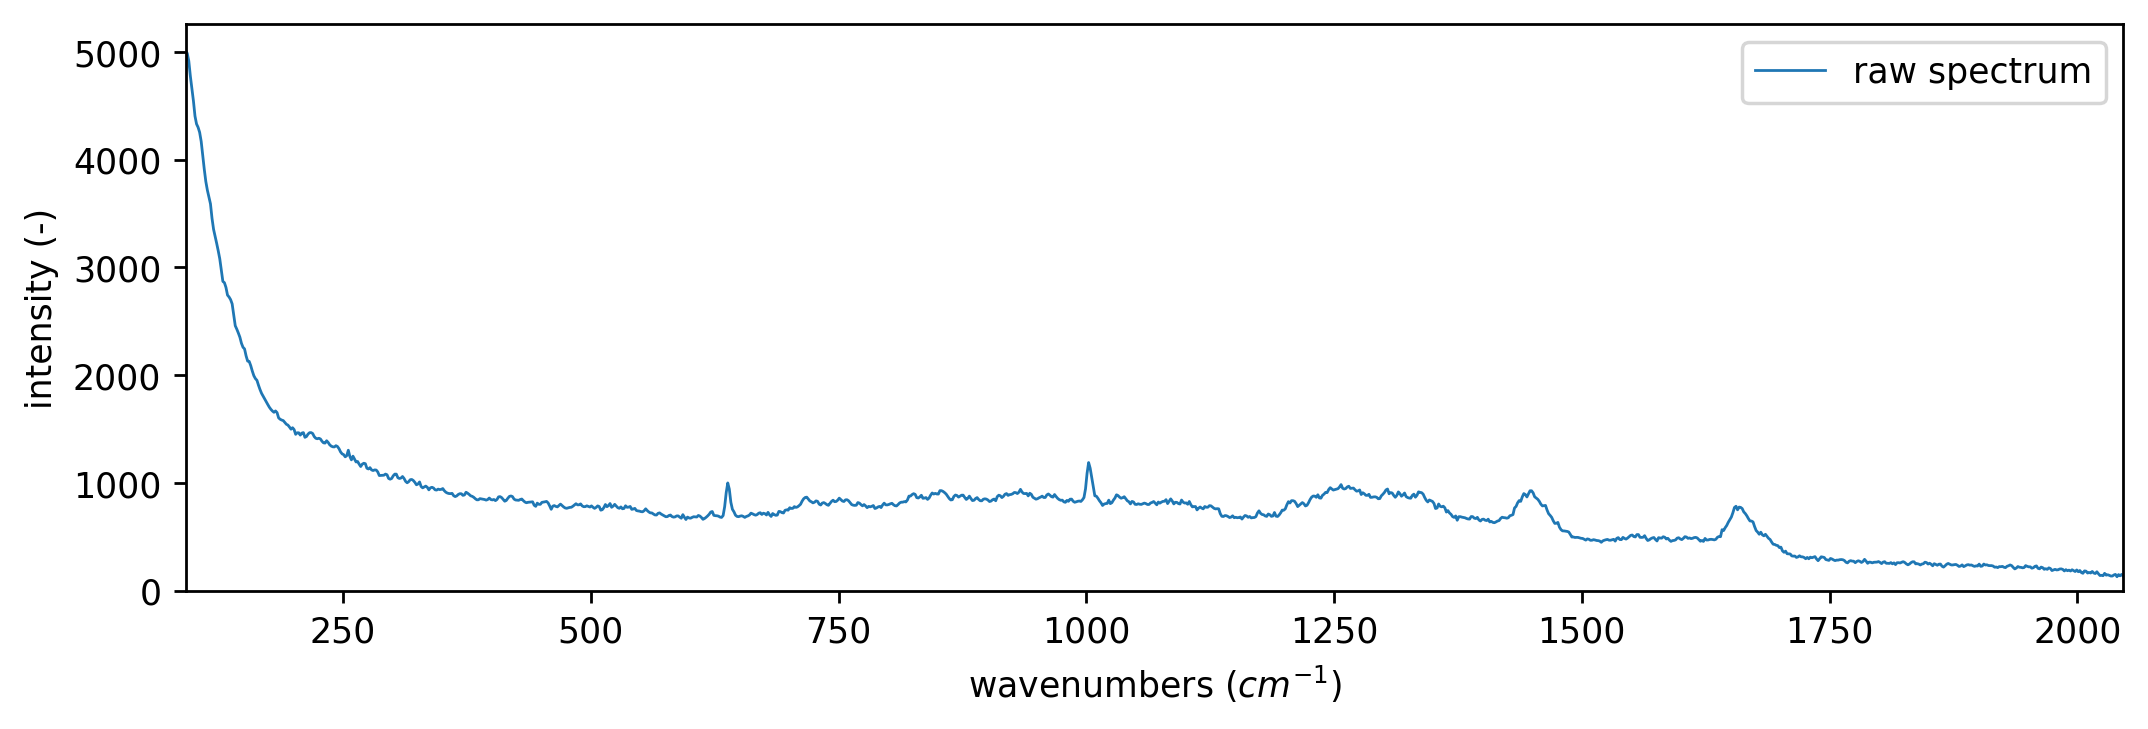

unfound cosmic rays 62 9 49


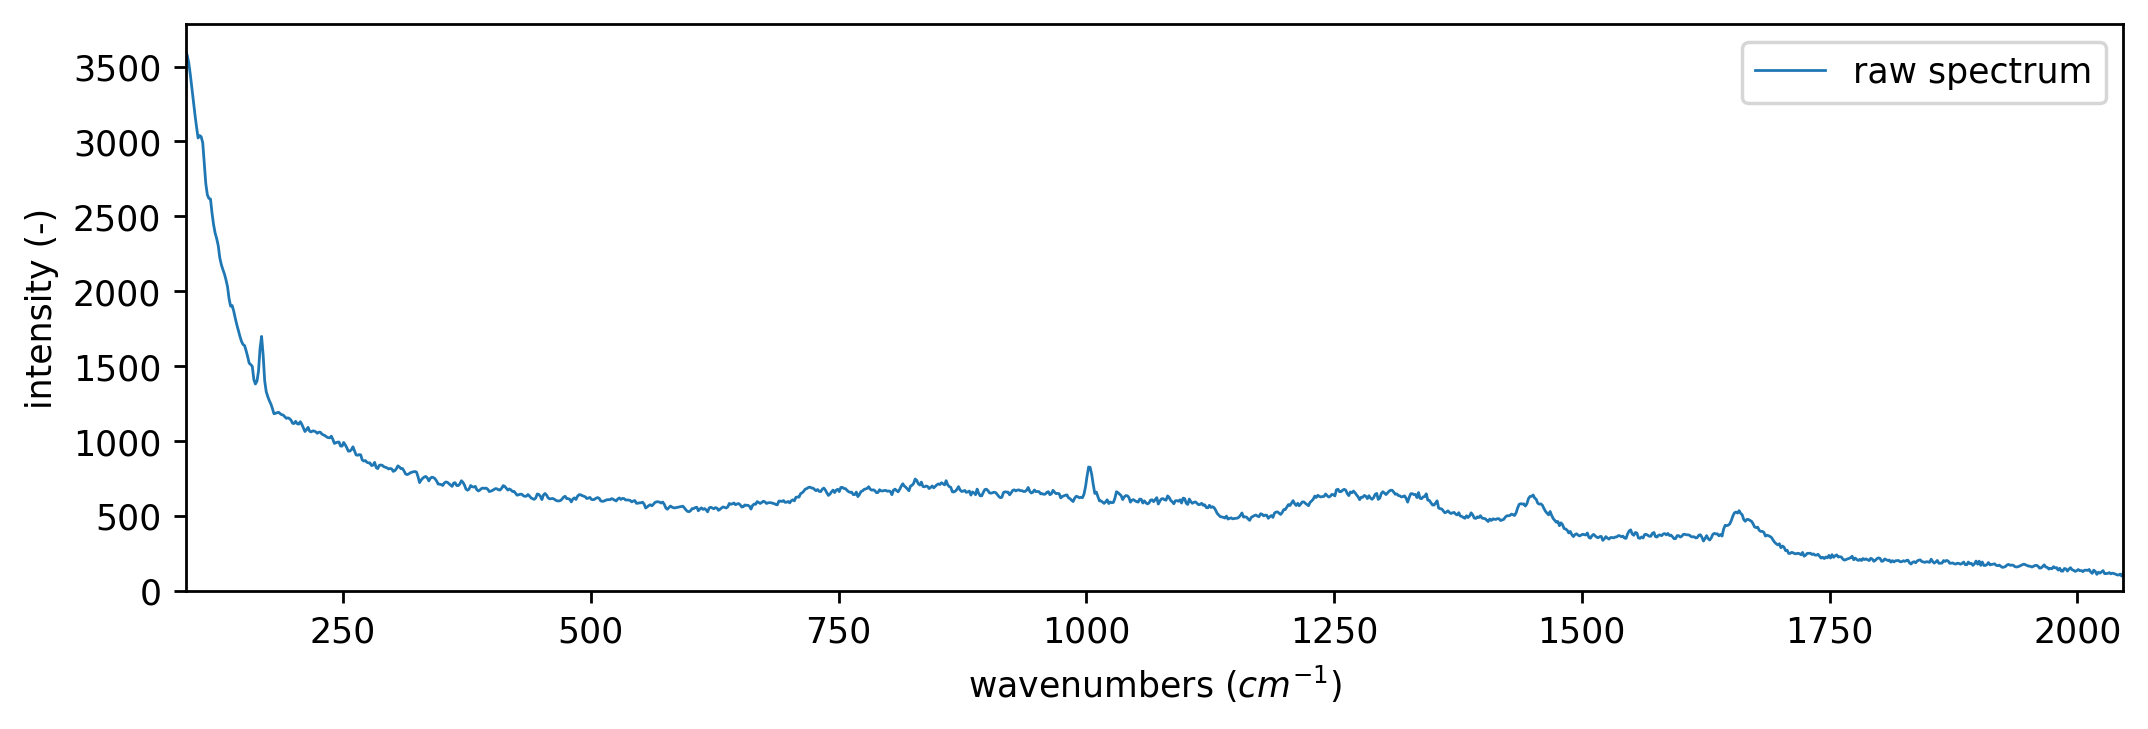

unfound cosmic rays 69 18 668


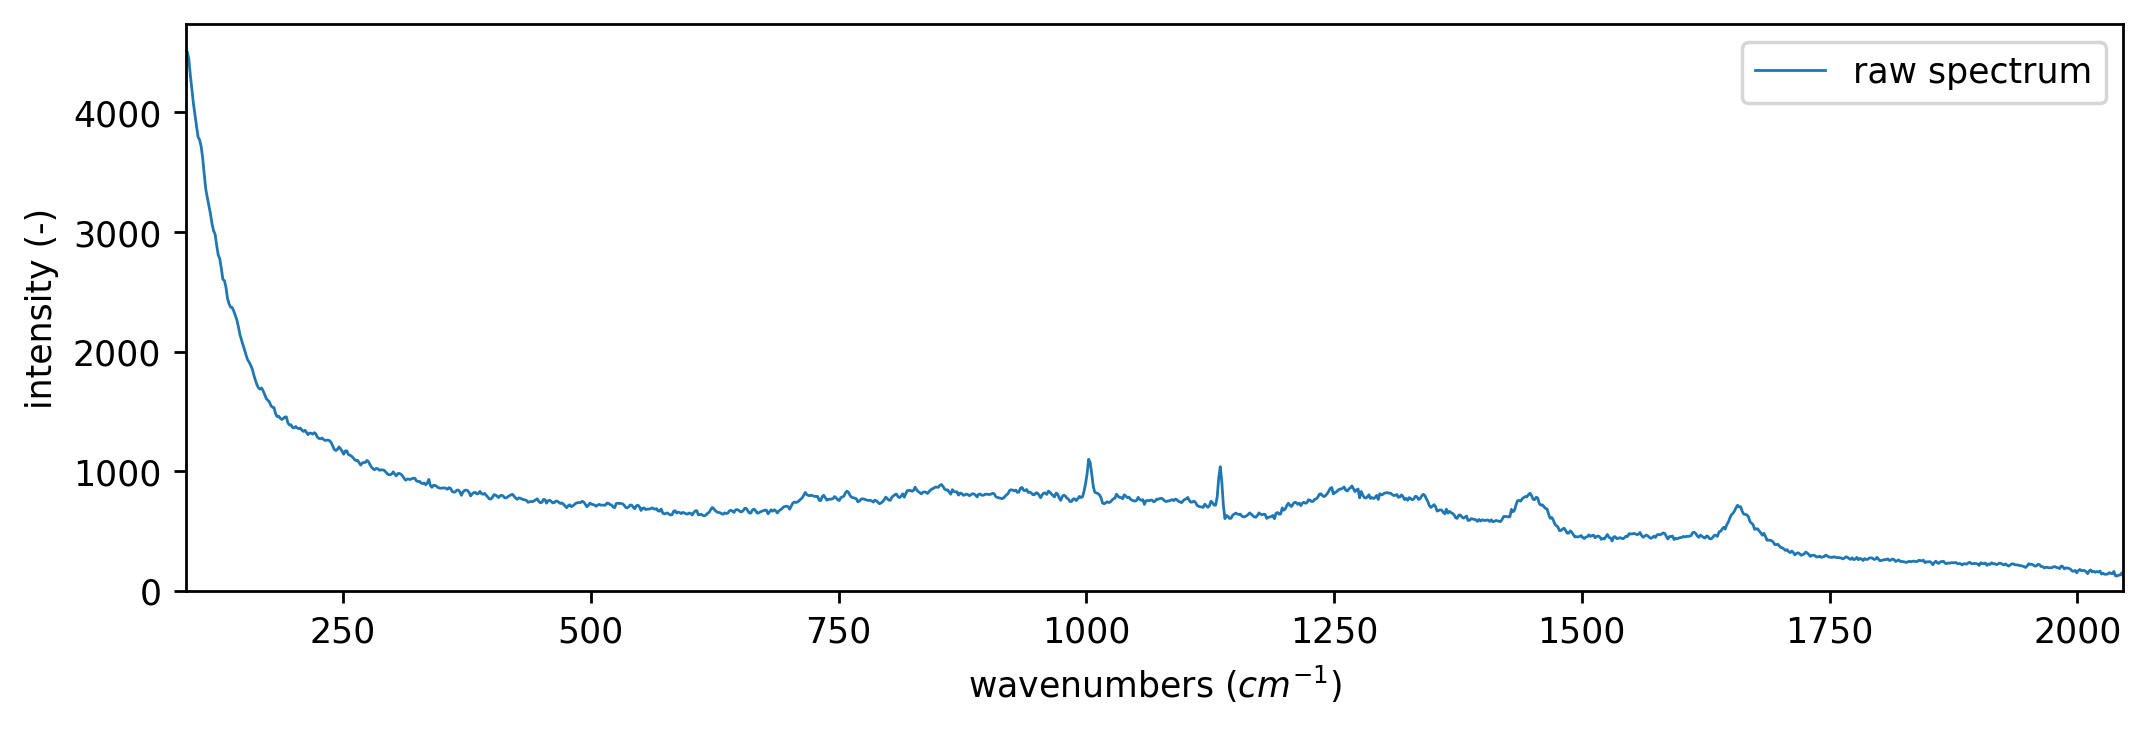

unfound cosmic rays 90 8 54


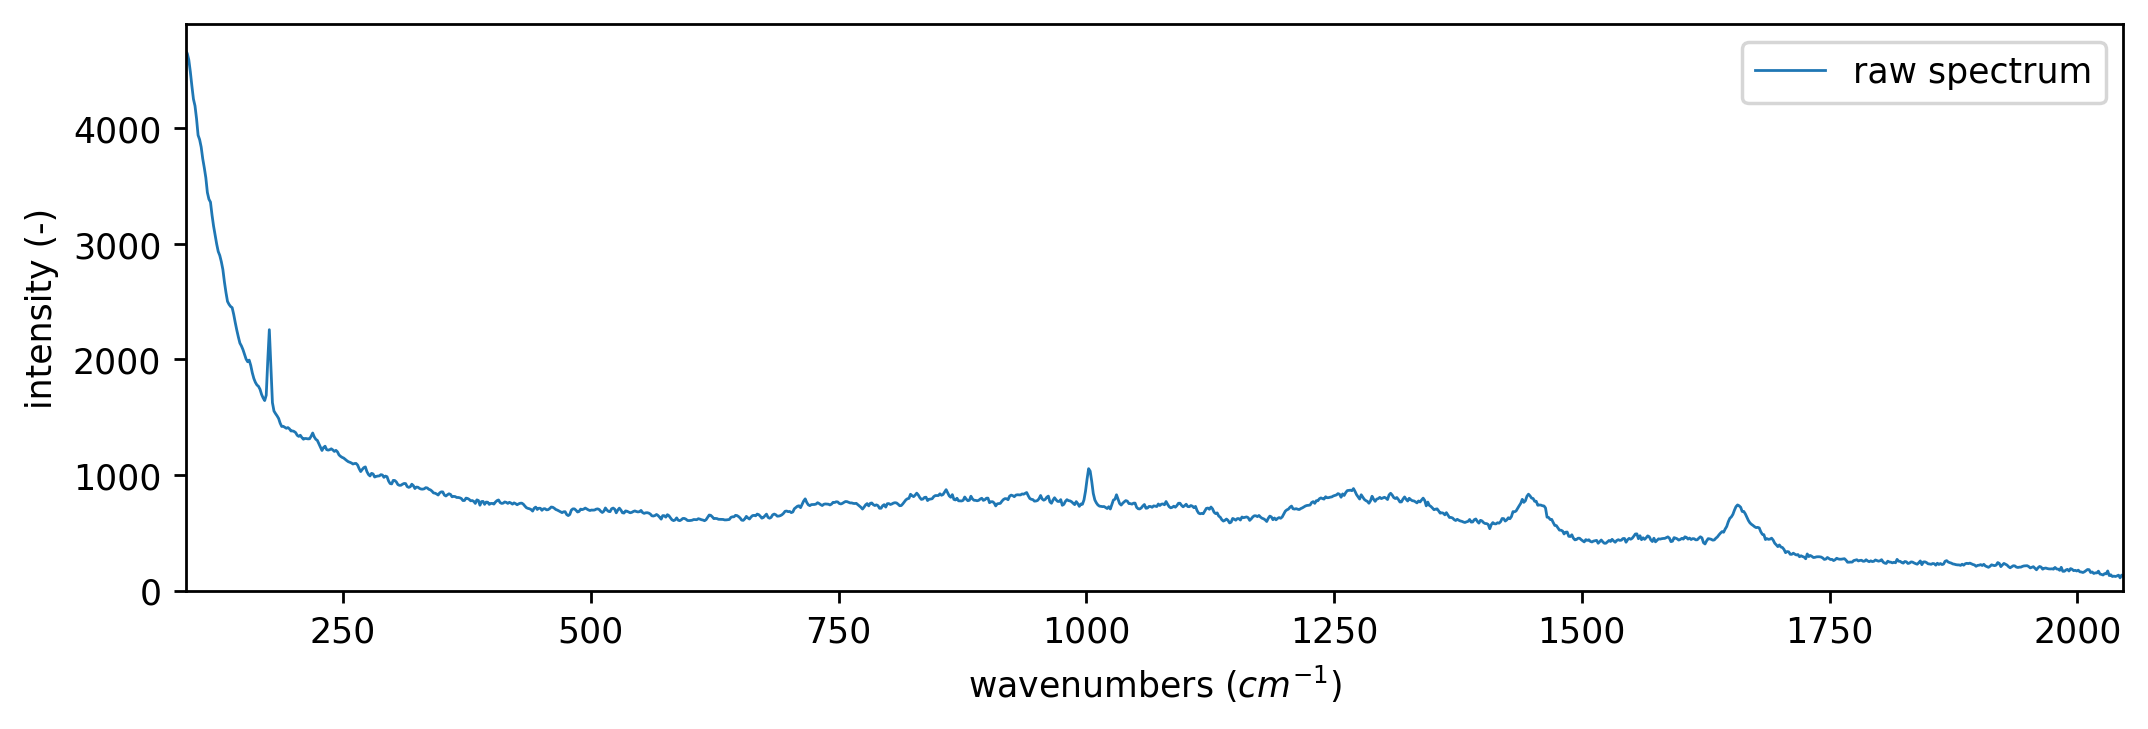

unfound cosmic rays 89 20 25


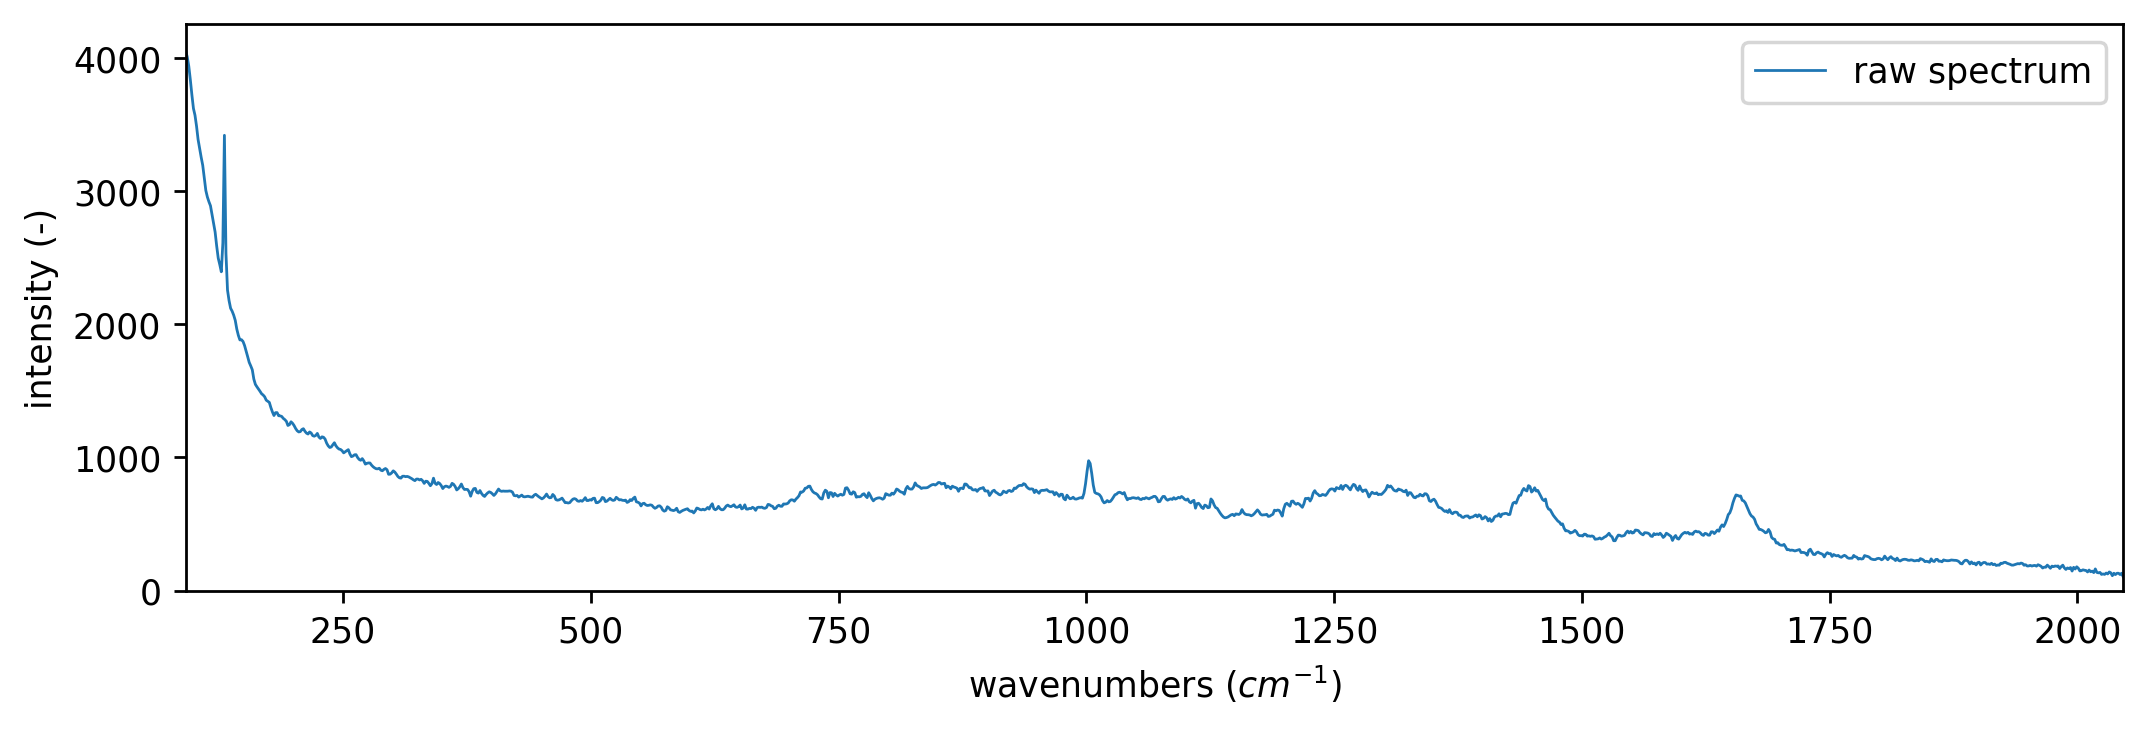

unfound cosmic rays 106 14 34


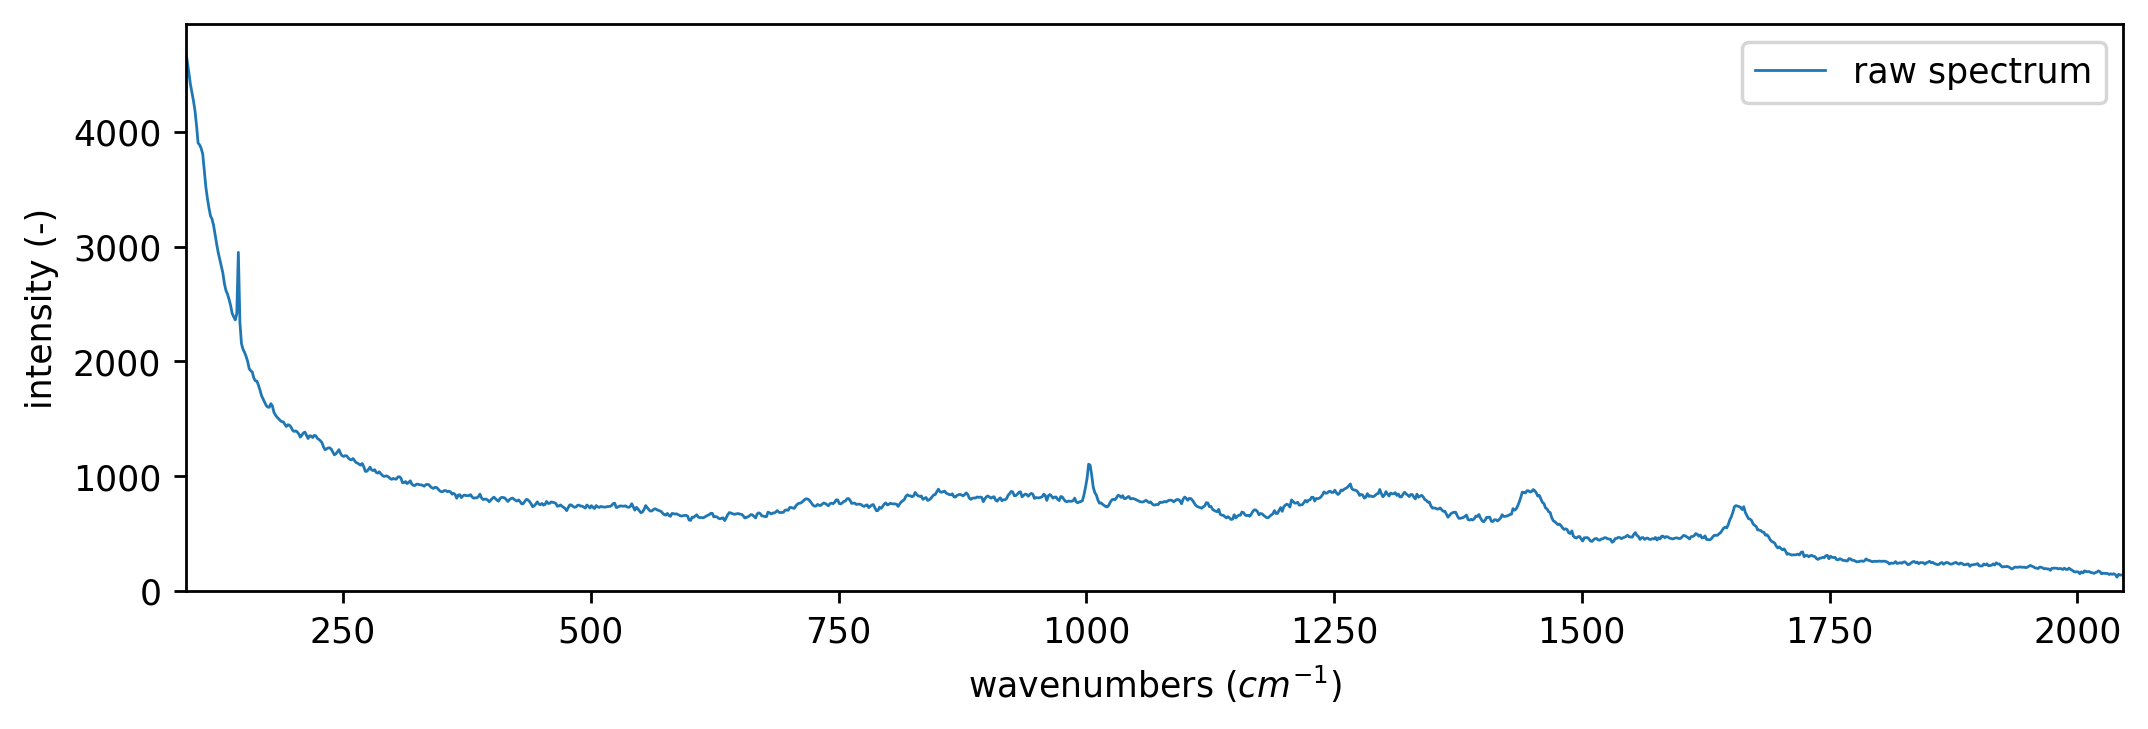

unfound cosmic rays 49 22 890


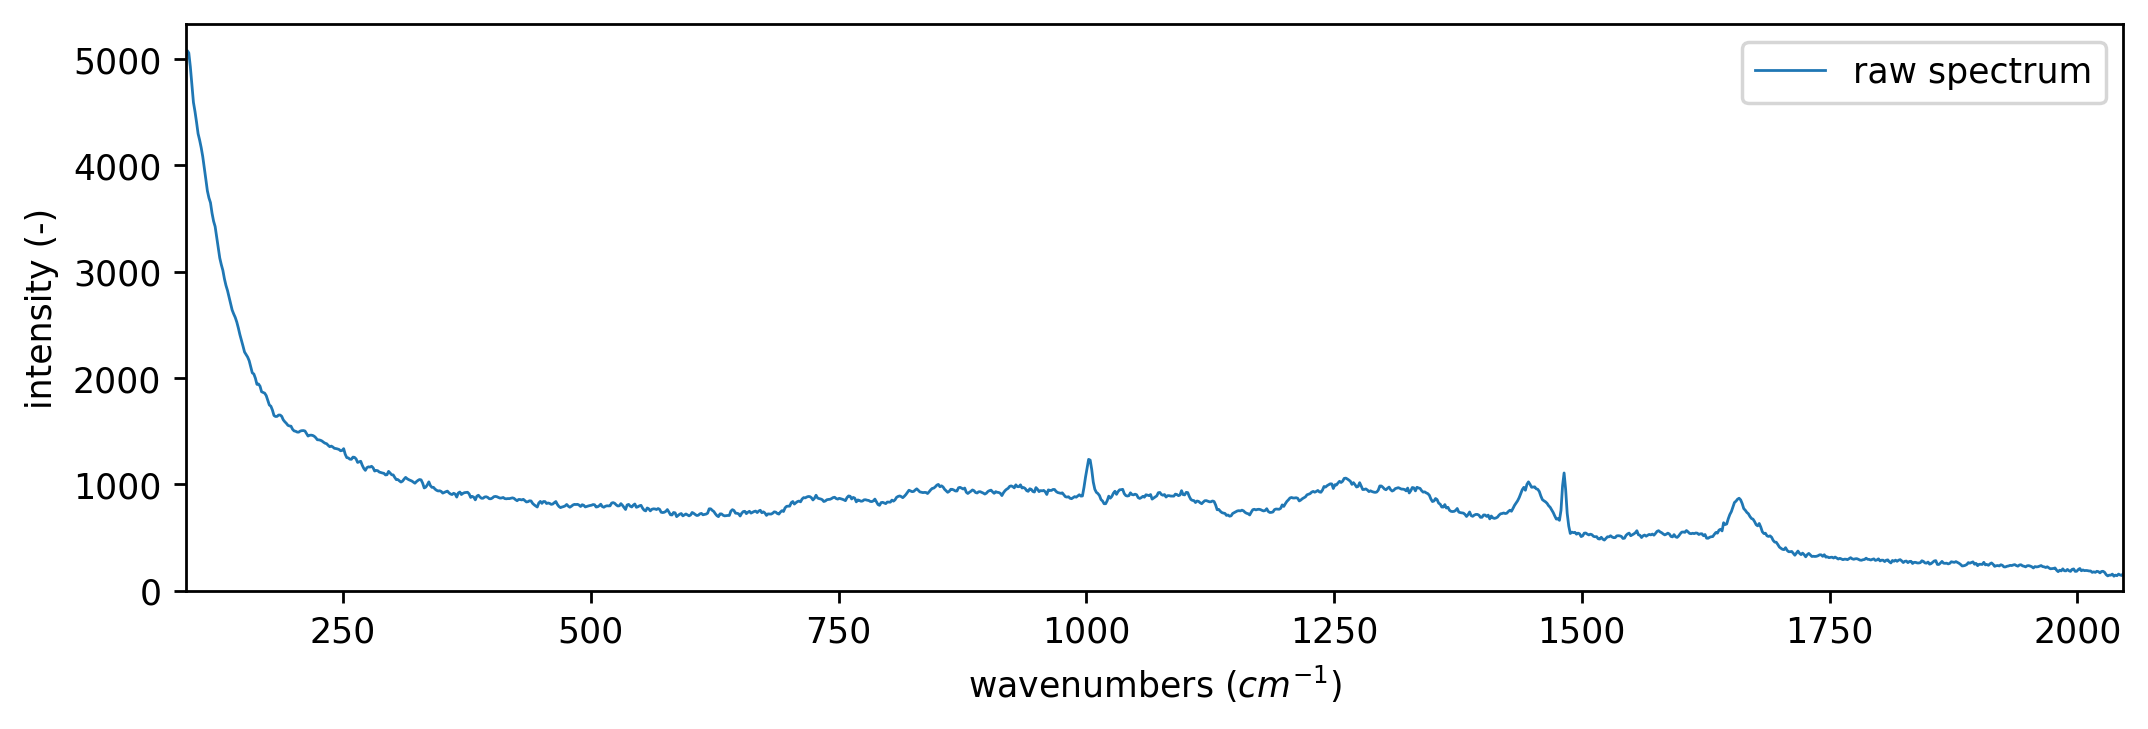

total unfound cosmic rays 9 0.0481283422459893


In [95]:
i = 0
for (x,y), values in t2.items():
    for v in values:
        if (x,y,v) not in cosmic_noise:
#             print("incorrectly found cosmic rays",x,y,v)
#             plt.plot(wavenumbers, new_img[x,y], label="raw spectrum")
#             plt.plot(wavenumbers, d2[x,y], label="cosmic ray noise correction")
#             plt.ylim(0)
#             plt.xlim(wavenumbers[0], wavenumbers[-1])
#             plt.xlabel(r"wavenumbers ($cm^{-1}$)")
#             plt.ylabel(r"intensity (-)")
#             plt.legend()
#             plt.show()
            i += 1
print(f"total incorrect found cosmic rays {i} {i/sum(count)}")

i = 0
for x,y,v in cosmic_noise:
    if (x,y) not in t2:
        print("unfound cosmic rays", x,y,v)
        plt.plot(wavenumbers, new_img[x,y], label="raw spectrum")
#         plt.plot(wavenumbers, d2[x,y], label="cosmic ray noise correction")
        plt.ylim(0)
        plt.xlim(wavenumbers[0], wavenumbers[-1])
        plt.xlabel(r"wavenumbers ($cm^{-1}$)")
        plt.ylabel(r"intensity (-)")
        plt.legend()
        plt.show()
        i += 1
    elif v not in t2[x,y]:
        for v2 in t2[x,y]:
            if abs(v - v2) < 30:
                break
        else:
#             print("unfound cosmic rays", x,y,v)
#             plt.plot(wavenumbers, new_img[x,y], label="raw spectrum")
#             plt.plot(wavenumbers, d2[x,y], label="cosmic ray noise correction")
#             plt.ylim(0)
#             plt.xlim(wavenumbers[0], wavenumbers[-1])
#             plt.xlabel(r"wavenumbers ($cm^{-1}$)")
#             plt.ylabel(r"intensity (-)")
#             plt.legend()
#             plt.show()
            i += 1
print(f"total unfound cosmic rays {i} {i/len(cosmic_noise)}")




In [87]:
# translate index to wavenumber
delta_w = (wavenumbers[-1] - wavenumbers[0]) / len(wavenumbers)
1 * delta_w, 3.0 *delta_w, 4/delta_w

(1.56148677740615, 4.68446033221845, 2.5616611410853984)

In [82]:
found_lst = []
incorrect_found_lst = []
unfound_lst = []
number_of_cosmic_gen = int(3750*0.05)
for _ in range(100):
    new_img = copy.copy(d)

    cosmic_noise = set()
    for _ in range(int(3750*0.05)):
        sigma = np.random.uniform(1.0,3.0) / 2.355
        height = np.random.uniform(300,2500)
        width = np.random.randint(5,35)
        location = np.random.randint(25,975)
        l, r = location - width//2, location + width//2
        x,y = np.random.randint(150), np.random.randint(25)

        new_img[x,y][l:r] += gaussian(np.arange(l,r), location, sigma) * height
        cosmic_noise.add((x,y,location))
        
    # stats to removal all cosmic ray noise (produces a very few false positives or noise detections)
    cosmicray_removal = CosmicrayCorrection.remove_cosmicrays(wavenumbers, 
                                                              n_times=7,
                                                              FWHM_smoothing=3,
                                                              min_FWHM=7,
                                                              region_padding=5,
                                                              occurrence_percentage=0.01,
                                                              interpolate_degree=3)
    d2, t2 = cosmicray_removal(copy.copy(new_img))
    wavenumber, count = np.unique([y for x in t2.values() for y, _ in x.items()], return_counts=True)
    found_lst.append(sum(count)) 
    
    i = 0
    for (x,y), values in t2.items():
        for v in values:
            if (x,y,v) not in cosmic_noise:
                i += 1
    incorrect_found_lst.append(i)

    i = 0
    for x,y,v in cosmic_noise:
        if (x,y) not in t2:
            i += 1
        elif v not in t2[x,y]:
            for v2 in t2[x,y]:
                if abs(v - v2) < 30:
                    break
            else:
                i += 1
    unfound_lst.append(i)

In [83]:
# for i in range(100):
#     print(incorrect_found_lst[i] / found_lst[i],"\t", unfound_lst[i] / number_of_cosmic_gen)

incorrect = np.array(incorrect_found_lst) / np.array(found_lst)
unfound = np.array(unfound_lst) / number_of_cosmic_gen
np.mean(1-unfound), np.std(1-unfound), np.mean(incorrect), np.std(incorrect), np.mean(unfound), np.std(unfound)

(0.9744385026737968,
 0.01218453627777372,
 0.026725550150537226,
 0.013048529304623411,
 0.025561497326203213,
 0.012184536277773722)

In [84]:
number_of_cosmic_gen - np.mean(unfound_lst),np.mean(incorrect_found_lst), np.mean(unfound_lst), np.mean(found_lst), number_of_cosmic_gen

(182.22, 5.02, 4.78, 186.82, 187)

In [85]:
np.std(incorrect_found_lst), np.std(unfound_lst), np.std(found_lst)

(2.5019192632856884, 2.278508283943686, 3.266129207487052)